# Trabalho Prático 1
### Matéria: Introdução a Computação Visual
### Alunos: Luís Gustavo Costa da Silva, Matheus Marchesotti Dutra Ferraz
### Matrículas:

 #### *Descrição*
 Abkaskdjkasjdlajflasdj

In [1]:
import numpy
import cv2
import matplotlib.pyplot as plt
from math import log10

In [2]:
def visualize(image_matrix, title):
    plt.title(title)
    image_plot = plt.imshow(image_matrix)
    plt.colorbar()
    return True

In [3]:
def compress():
    
    return

In [4]:
def decompress():
    
    return

In [5]:
def psnr(matrix_i, matrix_k):
    m, n = matrix.shape()
    
    mse = 0
    for i in range(m-1):
        for j in range(n-1):
            mse = mse + (matrix_i[i][j] - matrix_k[i][j])**2
            
    mse = mse/(m*n)
    max_number = max(max(matrix_i))
    psne = 10*log10(max_number**2 / mse)
    
    return psne

In [6]:
def compress_rate(original_image, compressed_image):
    pixels_i, pixels_j = original_image.shape
    compressed_pixels_i, compressed_pixels_j = compressed_image.shape
    
    compress_rate =  (compressed_pixels_i*compressed_pixels_j) / (pixels_i*pixels_j)
    
    return compress_rate

In [7]:
original_image = cv2.imread('woman-relaxed-work.jpg',0)
original_image

array([[217, 217, 216, ..., 172, 171, 170],
       [218, 217, 216, ..., 176, 175, 175],
       [218, 218, 217, ..., 174, 174, 175],
       ...,
       [171, 173, 173, ..., 192, 193, 192],
       [174, 172, 173, ..., 191, 192, 192],
       [175, 169, 172, ..., 189, 191, 191]], dtype=uint8)

True

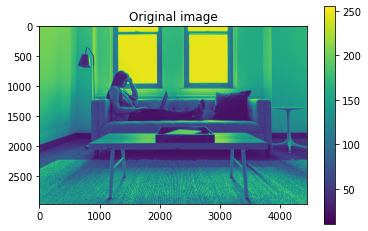

In [8]:
visualize(original_image, "Original image")

In [9]:
def subtract_matrix(image_matrix):
    subtract_128 = lambda i: i - 128
    vectorized_subtract_128 = numpy.vectorize(subtract_128)
    subtracted_image_matrix = vectorized_subtract_128(image_matrix)

    return subtracted_image_matrix

In [10]:
def add_matrix(image_matrix):
    add_128 = lambda i: i + 128
    vectorized_add_128 = numpy.vectorize(add_128)
    added_image_matrix = vectorized_add_128(image_matrix)

    return added_image_matrix

In [11]:
def add_padding(image_matrix):
    rows, columns = image_matrix.shape

    if(rows%8!=0):
        rows -= rows%8-8
    if(columns%8!=0):
        columns -= columns%8-8
        
    padded_image = numpy.zeros((rows,columns))
    padded_image[:image_matrix.shape[0],:image_matrix.shape[1]] = image_matrix
    
    return padded_image

In [12]:
def remove_padding(image_matrix):
    rows, columns = original_image.shape
    
    unpadded_image = image_matrix[:rows, :columns]
    
    return unpadded_image

In [13]:
quantization_table_1 = numpy.array([[16, 11, 10, 16, 24, 40, 51, 61], [12, 12, 14, 19, 26, 58, 60, 55], [14, 13, 16, 24, 40, 57, 69, 56], [14, 17, 22, 29, 51, 87, 80, 62], [18, 22, 37, 56, 68, 109, 103, 77], [24, 35, 55, 64, 81, 104, 113, 92], [49, 64, 78, 87, 103, 121, 120, 101], [72, 92, 95, 98, 112, 100, 103, 99]])
quantization_table_2 = numpy.array([[17, 18, 24, 47, 99, 99, 99, 99], [18, 21, 26, 66, 99, 99, 99, 99], [24, 26, 56, 99, 99, 99, 99, 99], [47, 66, 99, 99, 99, 99, 99, 99], [99, 99, 99, 99, 99, 99, 99, 99], [99, 99, 99, 99, 99, 99, 99, 99], [99, 99, 99, 99, 99, 99, 99, 99], [99, 99, 99, 99, 99, 99, 99, 99]])

In [14]:
image_matrix = numpy.array(original_image)
image_matrix

array([[217, 217, 216, ..., 172, 171, 170],
       [218, 217, 216, ..., 176, 175, 175],
       [218, 218, 217, ..., 174, 174, 175],
       ...,
       [171, 173, 173, ..., 192, 193, 192],
       [174, 172, 173, ..., 191, 192, 192],
       [175, 169, 172, ..., 189, 191, 191]], dtype=uint8)

In [15]:
padded_matrix = add_padding(image_matrix)

codified_matrix = numpy.zeros(padded_matrix.shape)

rows, columns = padded_matrix.shape
for r in range(0, rows, 8):
    for c in range(0, columns, 8):
        submatrix = padded_matrix[r:r+8, c:c+8]
        
        subtracted = subtract_matrix(submatrix)
        
        dct = cv2.dct(subtracted)
        
        quantized = numpy.divide(dct, quantization_table_1)
        quantized = numpy.around(quantized, decimals=0)
        
        codified_matrix[r:r+8, c:c+8] = quantized

In [16]:
decodified_image = numpy.zeros(padded_matrix.shape)

rows, columns = decodified_image.shape
for r in range(0, rows, 8):
    for c in range(0, columns, 8):
        submatrix = codified_matrix[r:r+8, c:c+8]
        
        dequantized = numpy.multiply(submatrix, quantization_table_1)

        inverse_dct = cv2.idct(dequantized)
        
        decodified = add_matrix(inverse_dct)
        decodified = numpy.around(decodified, decimals=0)
        
        decodified_image[r:r+8, c:c+8] = decodified
        
decodified_image = remove_padding(decodified_image)

In [17]:
if(decodified_image.min()<0):
    decodified_image -= -decodified_image.min()
if(decodified_image.max()>255):
    decodified_image *= 255.0/decodified_image.max()

True

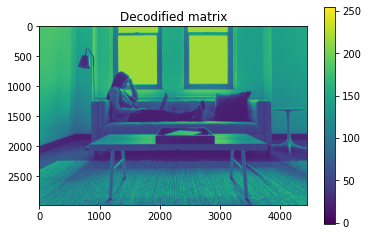

In [18]:
visualize(decodified_image, 'Decodified matrix')

In [19]:
# load

In [20]:
# visualize

In [21]:
# divide

In [22]:
# compress

In [23]:
# save

In [24]:
# visualize

In [25]:
# decompress

In [26]:
# visualize

In [27]:
# psnr and compress rate

Text(0.5, 1.0, 'Decodified image')

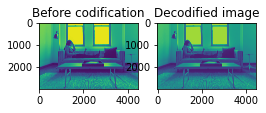

In [28]:
# final comparisson

figure = plt.figure()

ax = figure.add_subplot(1, 3, 1)
image_plot = plt.imshow(original_image)
ax.set_title("Before codification")

ax = figure.add_subplot(1, 3, 2)
image_plot = plt.imshow(decodified_image)
ax.set_title("Decodified image")